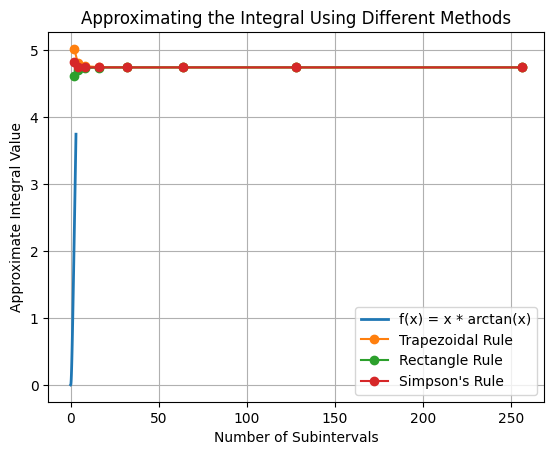

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return x * math.atan(x)

# Define the integral limits
a = 0
b = 3

# Define the desired precision
epsilon = 1e-4

# Function to calculate the integral using the trapezoidal rule
def trapezoidal_rule(func, a, b, n):
    h = (b - a) / n
    result = 0.5 * (func(a) + func(b))
    for i in range(1, n):
        result += func(a + i * h)
    result *= h
    return result

# Function to calculate the integral using the rectangle rule (midpoint rule)
def rectangle_rule(func, a, b, n):
    h = (b - a) / n
    result = 0
    for i in range(n):
        x_i = a + i * h + h / 2
        result += func(x_i)
    result *= h
    return result

# Function to calculate the integral using Simpson's rule
def simpsons_rule(func, a, b, n):
    h = (b - a) / n
    result = func(a) + func(b)
    for i in range(1, n, 2):
        result += 4 * func(a + i * h)
    for i in range(2, n - 1, 2):
        result += 2 * func(a + i * h)
    result *= h / 3
    return result

# Initialize variables
n = 2  # Initial number of subintervals

# Lists to store results for plotting
n_values = []
integral_trapezoid_values = []
integral_rectangle_values = []
integral_simpson_values = []

# Calculate the integral using each method until desired precision is met
while True:
    integral_trapezoid = trapezoidal_rule(f, a, b, n)
    integral_rectangle = rectangle_rule(f, a, b, n)
    integral_simpson = simpsons_rule(f, a, b, n)

    # Append results to lists for plotting
    n_values.append(n)
    integral_trapezoid_values.append(integral_trapezoid)
    integral_rectangle_values.append(integral_rectangle)
    integral_simpson_values.append(integral_simpson)

    # Check if the difference between consecutive results is less than epsilon
    if (
        abs(integral_trapezoid - integral_rectangle) <= epsilon and
        abs(integral_trapezoid - integral_simpson) <= epsilon
    ):
        break

    # If precision is not met, double the number of subintervals and iterate
    n *= 2

# Create an array of x values for plotting the function
x_values = np.linspace(a, b, 100)
y_values = [f(x) for x in x_values]

# Plot the function
plt.plot(x_values, y_values, label='f(x) = x * arctan(x)', linewidth=2)

# Plot the approximations using different methods
plt.plot(n_values, integral_trapezoid_values, label='Trapezoidal Rule', marker='o')
plt.plot(n_values, integral_rectangle_values, label='Rectangle Rule', marker='o')
plt.plot(n_values, integral_simpson_values, label="Simpson's Rule", marker='o')

# Add labels and legend
plt.xlabel('Number of Subintervals')
plt.ylabel('Approximate Integral Value')
plt.title('Approximating the Integral Using Different Methods')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
